# Data Analysis and Visualization
# *(10000 samples dataset)*
___

## Prepare Data

**Import required libraries for Data Analysis and Visualization**

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
sns.set(font_scale=1)

**Import excel file as a dataframe call data_10000**

In [29]:
data_10000 = pd.read_excel("E:\\VSProject\\TTNT\\DataScience\\data_10000_samples_clean.xlsx")
data_10000

,Time,Temp,Weather,Wind,Humidity,Barometer,Visibility,Day,Month,Year
0,12:00 SA,22,Passing clouds.,4,88,1016,NaN,1,3,2022
1,12:30 SA,22,Passing clouds.,4,88,1015,NaN,1,3,2022
2,1:00 SA,22,Passing clouds.,4,83,1015,NaN,1,3,2022
3,1:30 SA,21,Passing clouds.,4,88,1015,8.0,1,3,2022
4,2:00 SA,21,Passing clouds.,2,88,1015,8.0,1,3,2022
...,...,...,...,...,...,...,...,...,...,...
9996,6:00 CH,26,Partly cloudy.,22,89,1011,7.0,24,10,2022
9997,7:00 CH,25,Light rain. Partly cloudy.,2,89,1012,6.0,24,10,2022
9998,7:30 CH,25,Light rain. Partly cloudy.,2,89,1012,6.0,24,10,2022
9999,8:30 CH,25,Light rain. Partly cloudy.,9,89,1013,6.0,24,10,2022


**Check info() of data_DB**

In [30]:
data_10000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        10001 non-null  object 
 1   Temp        10001 non-null  int64  
 2   Weather     10001 non-null  object 
 3   Wind        10001 non-null  int64  
 4   Humidity    10001 non-null  int64  
 5   Barometer   10001 non-null  int64  
 6   Visibility  2066 non-null   float64
 7   Day         10001 non-null  int64  
 8   Month       10001 non-null  int64  
 9   Year        10001 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 781.5+ KB


**Data Preprocessing**

In [31]:
# Notice that >50% data value of Visibility is null
# Perhaps because of visibility at that time is infinite
data_10000.isnull().sum()

Time             0
Temp             0
Weather          0
Wind             0
Humidity         0
Barometer        0
Visibility    7935
Day              0
Month            0
Year             0
dtype: int64

In [32]:
# We will not focus on analysis and forecast this visibility feature 
# because of its significant numbers of null value
data = data_10000.drop(["Visibility"], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       10001 non-null  object
 1   Temp       10001 non-null  int64 
 2   Weather    10001 non-null  object
 3   Wind       10001 non-null  int64 
 4   Humidity   10001 non-null  int64 
 5   Barometer  10001 non-null  int64 
 6   Day        10001 non-null  int64 
 7   Month      10001 non-null  int64 
 8   Year       10001 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 703.3+ KB


## Data Analysis and Visualization

**Some important Descriptive Statistics**

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,10001.0,27.917108,3.501432,19.0,26.0,27.0,30.0,39.0
Wind,10001.0,8.246675,6.517073,0.0,4.0,7.0,11.0,76.0
Humidity,10001.0,76.499750,12.847600,37.0,67.0,79.0,89.0,100.0
Barometer,10001.0,1007.983702,4.118815,984.0,1005.0,1008.0,1011.0,1022.0
Day,10001.0,15.454055,8.712457,1.0,8.0,15.0,23.0,31.0
Month,10001.0,6.277272,2.245042,3.0,4.0,6.0,8.0,10.0
Year,10001.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0


array([[<AxesSubplot: title={'center': 'Temp'}>,
        <AxesSubplot: title={'center': 'Wind'}>,
        <AxesSubplot: title={'center': 'Humidity'}>],
       [<AxesSubplot: title={'center': 'Barometer'}>,
        <AxesSubplot: title={'center': 'Day'}>,
        <AxesSubplot: title={'center': 'Month'}>],
       [<AxesSubplot: title={'center': 'Year'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

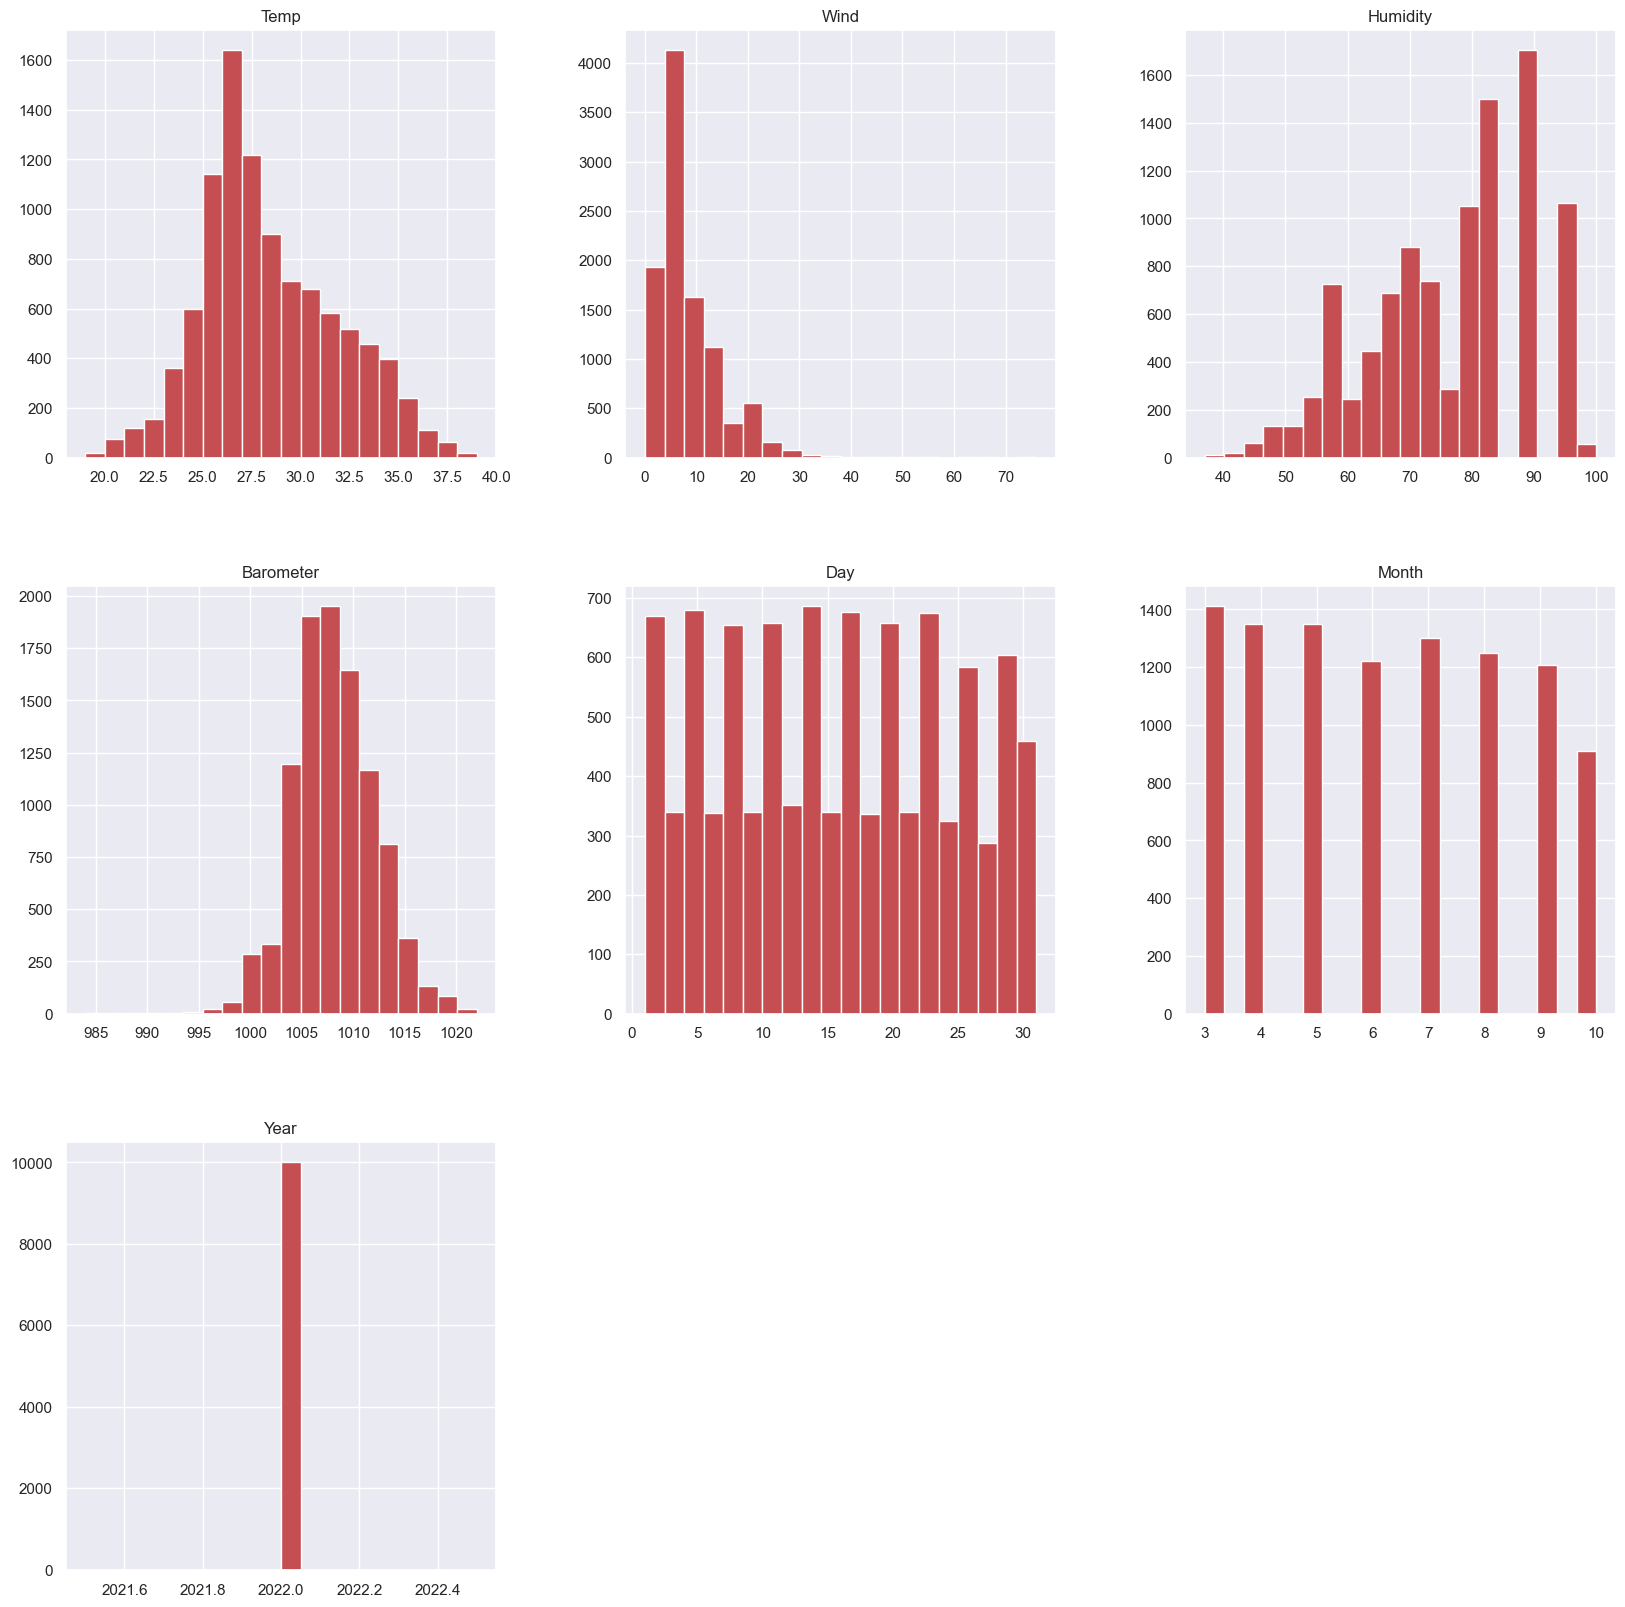

In [34]:
data.hist(bins = 20, figsize = (20,20), color = 'r')

**Information of weather types**

In [35]:
weather_type = data["Weather"].unique()
print(weather_type)
print(len(weather_type))

['Passing clouds.' 'Scattered clouds.' 'Light rain. Passing clouds.'
 'Partly cloudy.' 'Mostly cloudy.' 'Partly sunny.' 'Overcast.'
 'Broken clouds.' 'Light rain. Broken clouds.' 'Warm.'
 'Light rain. Partly cloudy.' 'Clear.' 'Sunny.' 'Fog.' 'Light rain. Fog.'
 'Thundershowers. Passing clouds.' 'Sprinkles. Passing clouds.'
 'Rain showers. Partly cloudy.' 'Rain showers. Broken clouds.'
 'Rain. Broken clouds.' 'Light rain. Partly sunny.' 'Rain. Partly cloudy.'
 'Rain. Mostly cloudy.' 'Light rain. Mostly cloudy.'
 'Lots of rain. Mostly cloudy.' 'Rain showers. Mostly cloudy.'
 'Light rain. More clouds than sun.' 'Rain. More clouds than sun.'
 'Rain showers. Cloudy.' 'More clouds than sun.'
 'Thundershowers. Broken clouds.' 'Strong thunderstorms. Overcast.'
 'Thunderstorms. Overcast.' 'Thunderstorms. Broken clouds.'
 'Thunderstorms. Passing clouds.' 'Thunderstorms. Partly cloudy.'
 'Rain showers. Passing clouds.' 'Thundershowers. Scattered clouds.'
 'Thunderstorms. Scattered clouds.' 'Light

C:\Users\DELL\AppData\Local\Temp\ipykernel_16300\1238889770.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


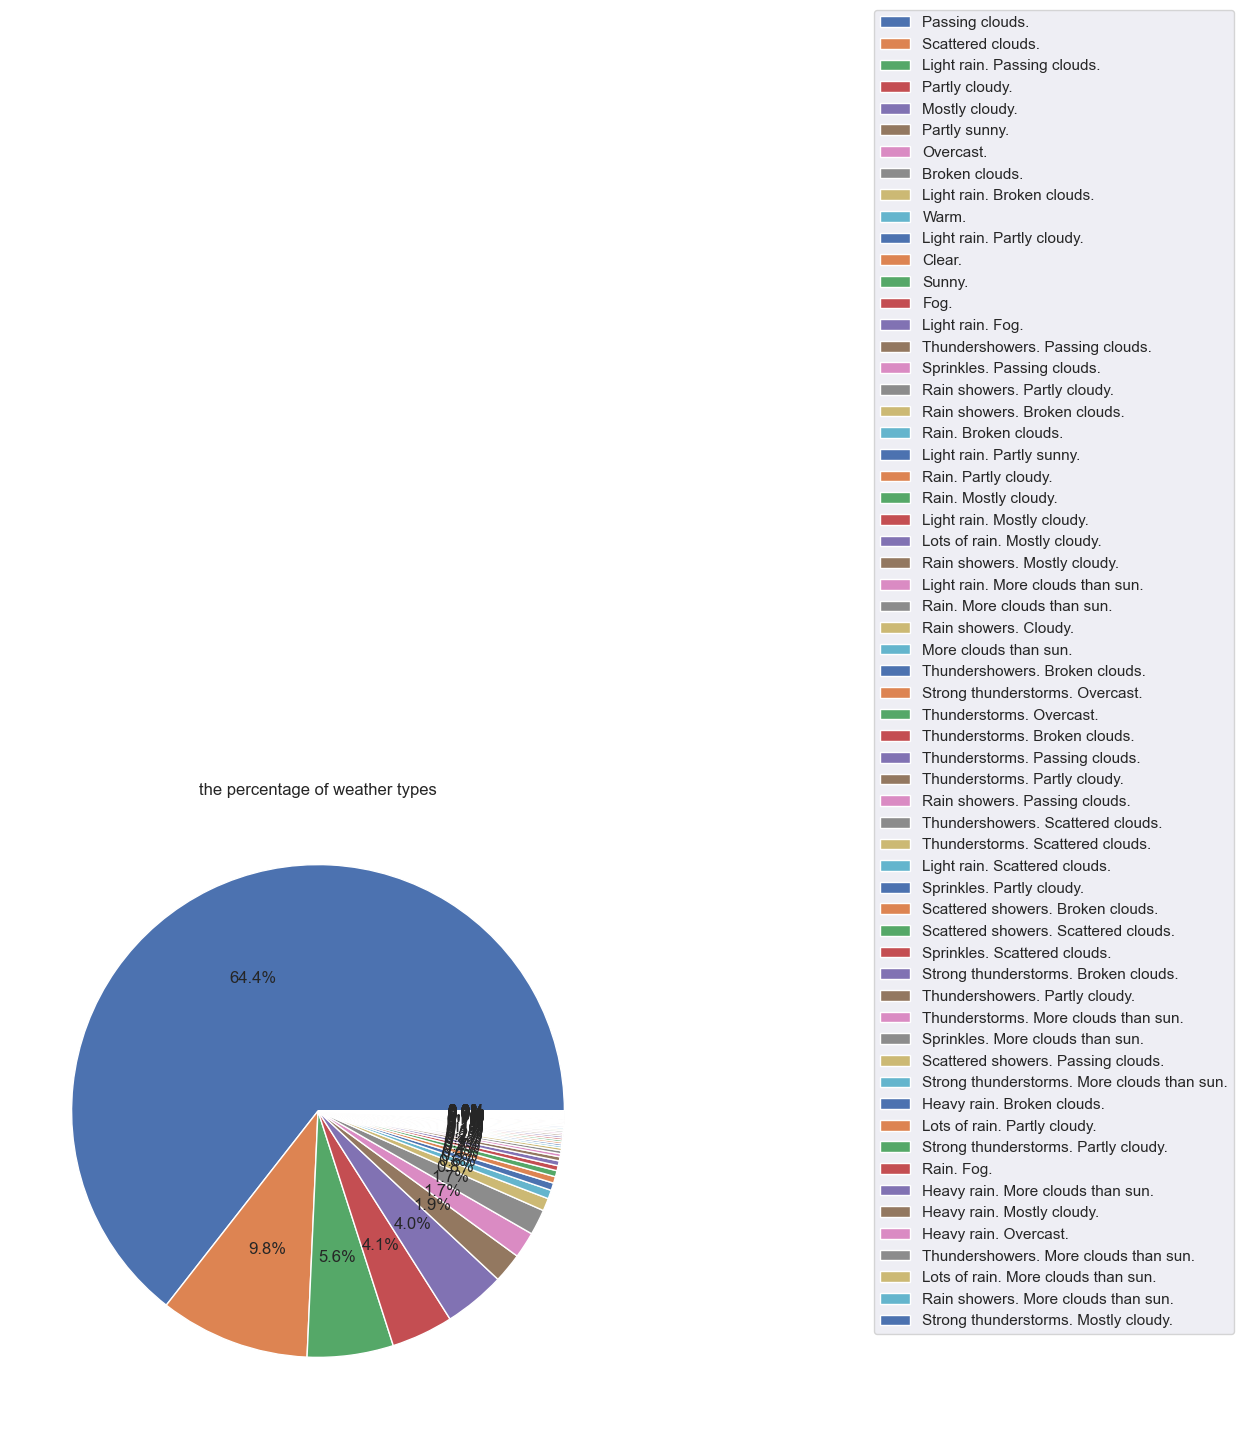

In [36]:
plt.figure(figsize = (10,8))
plt.title('the percentage of weather types')
plt.pie(data_10000["Weather"].value_counts().values, autopct='%1.1f%%')
plt.legend(labels=data_10000['Weather'].unique(), bbox_to_anchor=(2, 2.3))
plt.tight_layout()


* In year 2022, primarily type of weather is Cloudy, especially passing clouds, scattered cloudy

In [37]:
datatest = data.copy()


**Information of features according to day**

Month
3     AxesSubplot(0.125,0.11;0.775x0.77)
4     AxesSubplot(0.125,0.11;0.775x0.77)
5     AxesSubplot(0.125,0.11;0.775x0.77)
6     AxesSubplot(0.125,0.11;0.775x0.77)
7     AxesSubplot(0.125,0.11;0.775x0.77)
8     AxesSubplot(0.125,0.11;0.775x0.77)
9     AxesSubplot(0.125,0.11;0.775x0.77)
10    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Temp, dtype: object

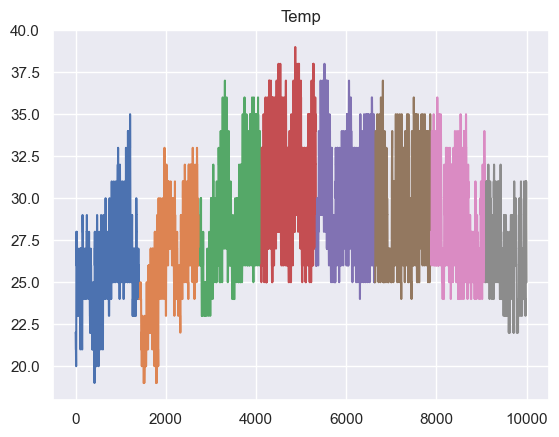

In [38]:
# Temp
plt.title('Temp')
datatest.groupby('Month')['Temp'].plot()

* Temperature is high between the month of 5 and that of 7

Month
3     AxesSubplot(0.125,0.11;0.775x0.77)
4     AxesSubplot(0.125,0.11;0.775x0.77)
5     AxesSubplot(0.125,0.11;0.775x0.77)
6     AxesSubplot(0.125,0.11;0.775x0.77)
7     AxesSubplot(0.125,0.11;0.775x0.77)
8     AxesSubplot(0.125,0.11;0.775x0.77)
9     AxesSubplot(0.125,0.11;0.775x0.77)
10    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Humidity, dtype: object

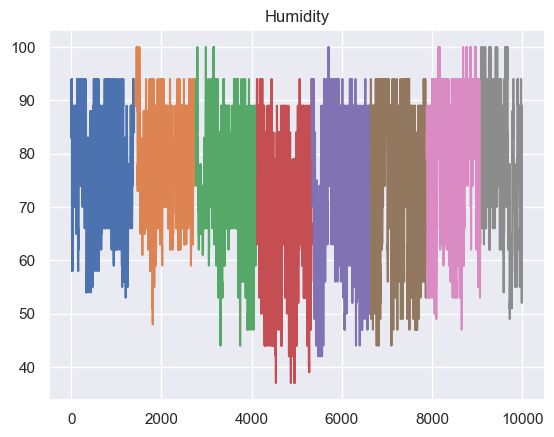

In [39]:
# Humidity
plt.title('Humidity')
datatest.groupby('Month')['Humidity'].plot()

* Humidity is low between the month of 5 and that of 7

Month
3     AxesSubplot(0.125,0.11;0.775x0.77)
4     AxesSubplot(0.125,0.11;0.775x0.77)
5     AxesSubplot(0.125,0.11;0.775x0.77)
6     AxesSubplot(0.125,0.11;0.775x0.77)
7     AxesSubplot(0.125,0.11;0.775x0.77)
8     AxesSubplot(0.125,0.11;0.775x0.77)
9     AxesSubplot(0.125,0.11;0.775x0.77)
10    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Wind, dtype: object

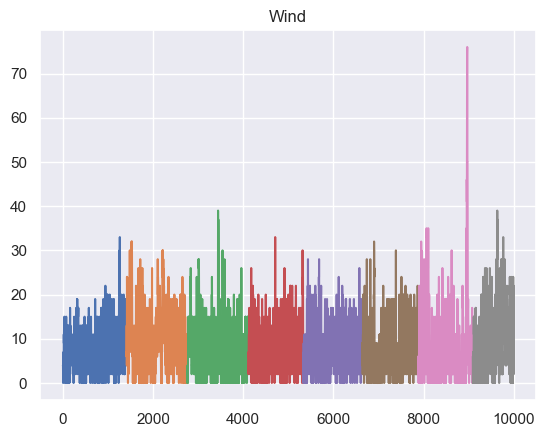

In [40]:
# Wind
plt.title('Wind')
datatest.groupby('Month')['Wind'].plot()

* Wind blows significantly strong in the last days of September
* Perhaps it is the time of hurricane 

Month
3     AxesSubplot(0.125,0.11;0.775x0.77)
4     AxesSubplot(0.125,0.11;0.775x0.77)
5     AxesSubplot(0.125,0.11;0.775x0.77)
6     AxesSubplot(0.125,0.11;0.775x0.77)
7     AxesSubplot(0.125,0.11;0.775x0.77)
8     AxesSubplot(0.125,0.11;0.775x0.77)
9     AxesSubplot(0.125,0.11;0.775x0.77)
10    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Barometer, dtype: object

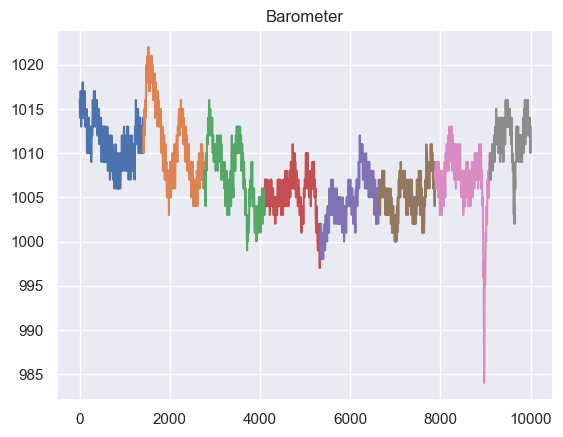

In [41]:
# Barometer
plt.title('Barometer')
datatest.groupby('Month')['Barometer'].plot()

* Barometer is significant low in the last days of September
* Perhaps it has heavy rain.

**Interesting notice that Temp is inversely proportional to humidity**

<AxesSubplot: xlabel='Temp', ylabel='Humidity'>

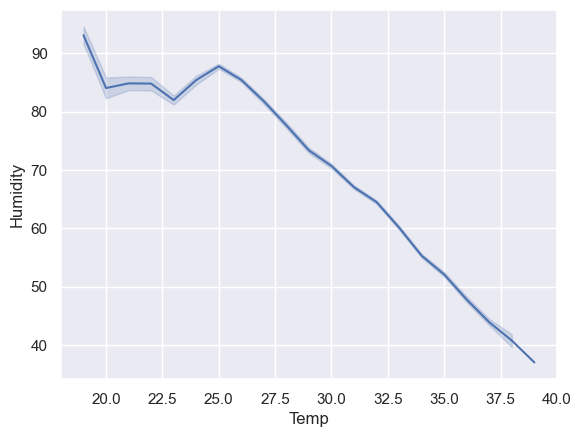

In [42]:
sns.lineplot(datatest, x = datatest['Temp'], y = datatest['Humidity'])

* Proven. When temperature increase, the air will become drier, so humidity reduce and vice versa.

**Correlation heatmap**

<AxesSubplot: title={'center': 'Correlation Heatmap of 4 features'}>

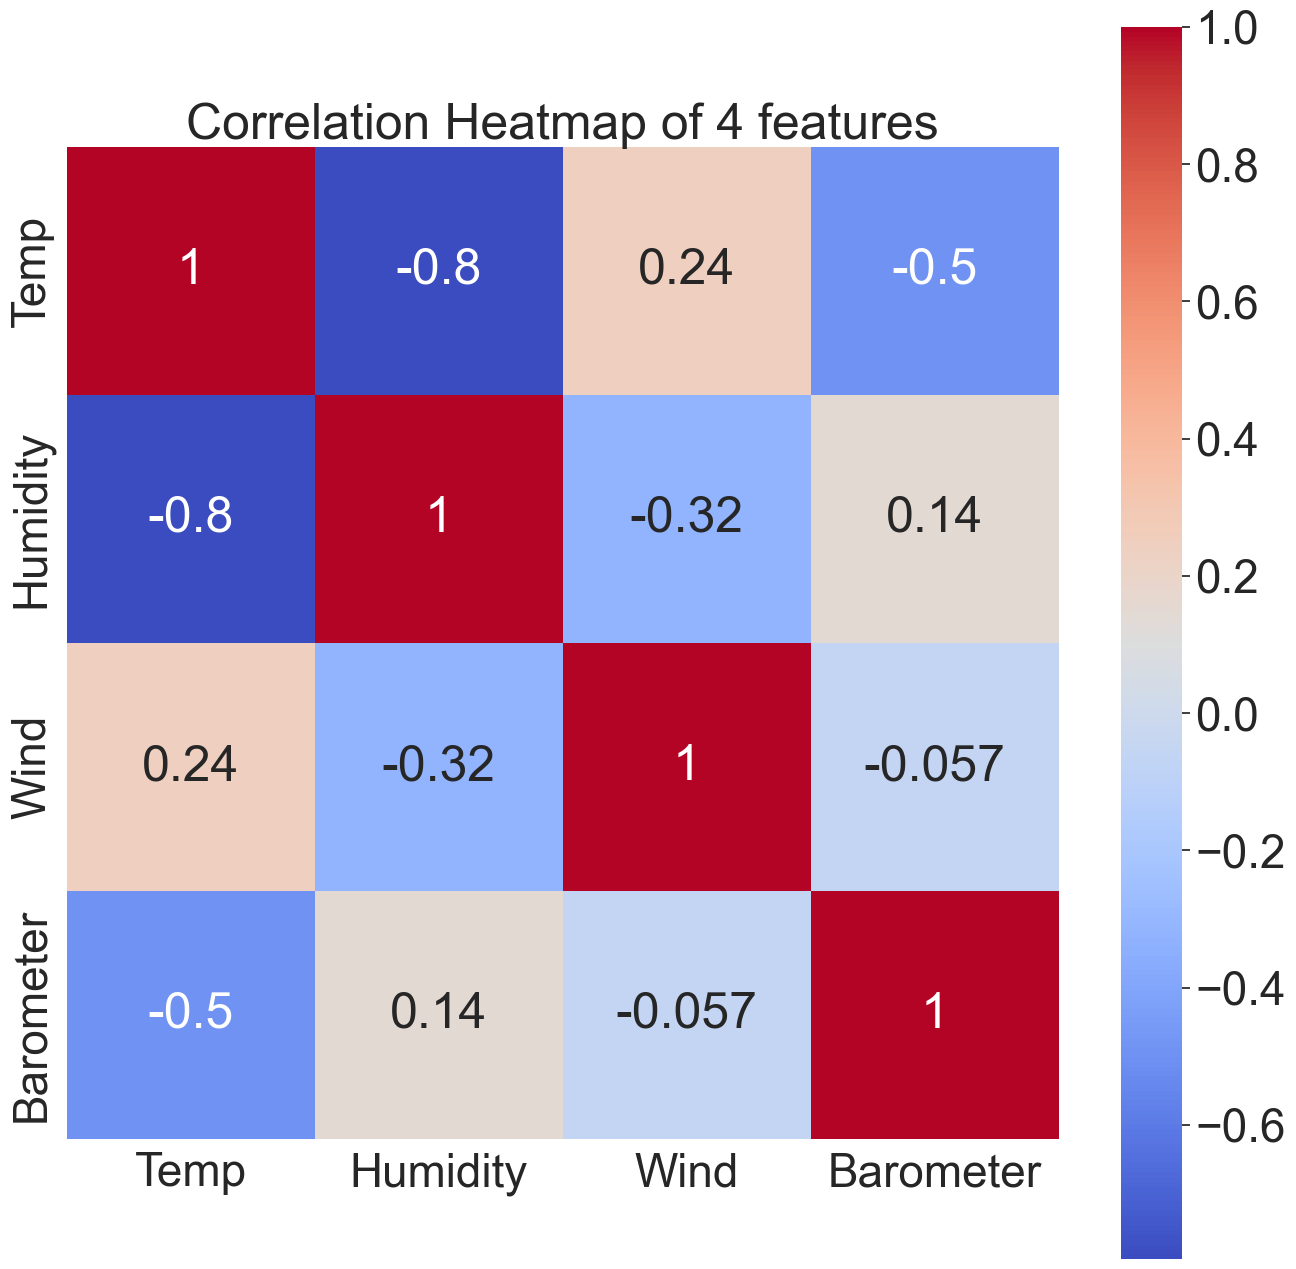

In [43]:
sns.set(font_scale=3)

fig, ax = plt.subplots()
plt.title('Correlation Heatmap of 4 features')
fig.set_size_inches((16,16))
sns.heatmap(datatest[['Temp', 'Humidity', 'Wind', 'Barometer']].corr(), square = True, annot = True, cmap='coolwarm')

# Walkthrough above analysis, Temp is inversely proporsional to Humidity and Barometer, but proporsional to Wind
# Another relationship can be seen in matrix.